In [8]:
import numpy as np
import matplotlib.pyplot as plt
import datasets
import matplotlib.transforms as mtransforms
import evaluate
import pandas as pd
from scipy.stats import wasserstein_distance as wass

In [9]:
#Main Plot

data_bart_none_cnn = datasets.load_from_disk("../bart/saved_models/BART-None-cnn/")
data_bart_none_xsum = datasets.load_from_disk("../bart/saved_models/BART-None-xsum/")
data_bart_none_news = datasets.load_from_disk("../bart/saved_models/BART-None-news/")
data_bart_none_reddit = datasets.load_from_disk("../bart/saved_models/BART-None-reddit/")

data_pegasus_none_cnn = datasets.load_from_disk("../pegasus/saved_models/pegasus-None-cnn/")
data_pegasus_none_xsum = datasets.load_from_disk("../pegasus/saved_models/pegasus-None-xsum/")
data_pegasus_none_news = datasets.load_from_disk("../pegasus/saved_models/pegasus-None-news/")
data_pegasus_none_reddit = datasets.load_from_disk("../pegasus/saved_models/pegasus-None-reddit/")

data_dolly_cnn = datasets.load_from_disk("../dolly2/saved_models/Dollyv2-cnn/")
data_dolly_xsum = datasets.load_from_disk("../dolly2/saved_models/Dollyv2-xsum_capped_random/")
data_dolly_news = datasets.load_from_disk("../dolly2/saved_models/Dollyv2-news_capped_random/")
data_dolly_reddit = datasets.load_from_disk("../dolly2/saved_models/Dollyv2-reddit_capped_random/")


data_gpt_cnn = datasets.load_from_disk("../chatGPT/saved_models/GPT-3.5-Turbo-cnn/")
data_gpt_xsum = datasets.load_from_disk("../chatGPT/saved_models/GPT-3.5-Turbo-xsum-capped_random/")
data_gpt_news = datasets.load_from_disk("../chatGPT/saved_models/GPT-3.5-Turbo-news-capped_random/")
data_gpt_reddit = datasets.load_from_disk("../chatGPT/saved_models/GPT-3.5-Turbo-reddit/")

data_llama_cnn = datasets.load_from_disk("../llama/saved_models/LlaMa2-cnn/")
data_llama_xsum = datasets.load_from_disk("../llama//saved_models/LlaMa2-xsum-capped_random/")
data_llama_news = datasets.load_from_disk("../llama//saved_models/LlaMa2-news-capped_random/")
data_llama_reddit = datasets.load_from_disk("../llama//saved_models/LlaMa2-reddit-capped_random/")

data_llama_news_rouge = datasets.load_from_disk("../llama//saved_models/LlaMa2-news-capped_random-rouge/")
data_llama_reddit_rouge = datasets.load_from_disk("../llama//saved_models/LlaMa2-reddit-capped_random-rouge/")

In [10]:
#Main Plot

data_bart_none_cnn_csv = pd.read_csv("../bart/results/BART-None-cnn.csv")
data_bart_none_xsum_csv = pd.read_csv("../bart/results/BART-None-xsum.csv")
data_bart_none_news_csv = pd.read_csv("../bart/results/BART-None-news.csv")
data_bart_none_reddit_csv = pd.read_csv("../bart/results/BART-None-reddit.csv")

data_pegasus_none_cnn_csv = pd.read_csv("../pegasus/results/pegasus-None-cnn.csv")
data_pegasus_none_xsum_csv = pd.read_csv("../pegasus/results/pegasus-None-xsum.csv")
data_pegasus_none_news_csv = pd.read_csv("../pegasus/results/pegasus-None-news.csv")
data_pegasus_none_reddit_csv = pd.read_csv("../pegasus/results/pegasus-None-reddit.csv")

data_dolly_cnn_csv = pd.read_csv("../dolly2/results/Dollyv2-cnn.csv")
data_dolly_xsum_csv = pd.read_csv("../dolly2/results/Dollyv2-xsum_capped_random.csv")
data_dolly_news_csv = pd.read_csv("../dolly2/results/Dollyv2-news_capped_random.csv")
data_dolly_reddit_csv = pd.read_csv("../dolly2/results/Dollyv2-reddit_capped_random.csv")


data_gpt_cnn_csv = pd.read_csv("../chatGPT/results/GPT-3.5-Turbo-cnn.csv")
data_gpt_xsum_csv = pd.read_csv("../chatGPT/results/GPT-3.5-Turbo-xsum-capped_random.csv")
data_gpt_news_csv = pd.read_csv("../chatGPT/results/GPT-3.5-Turbo-news-capped_random.csv")
data_gpt_reddit_csv = pd.read_csv("../chatGPT/results/GPT-3.5-Turbo-reddit.csv")

data_llama_cnn_csv = pd.read_csv("../llama//results/LlaMa2-cnn.csv")
data_llama_xsum_csv = pd.read_csv("../llama//results/LlaMa2-xsum-capped_random.csv")
data_llama_news_csv = pd.read_csv("../llama//results/LlaMa2-news-capped_random.csv")
data_llama_reddit_csv = pd.read_csv("../llama//results/LlaMa2-reddit-capped_random.csv")

data_llama_news_rouge_csv = pd.read_csv("../llama//results/LlaMa2-news-capped_random-rouge.csv")
data_llama_reddit_rouge_csv = pd.read_csv("../llama//results/LlaMa2-reddit-capped_random-rouge.csv")

In [11]:
def get_lines(data):
    cumm_list1 = [0]*10
    cumm_list2 = [0]*10

    for ind, da in enumerate(data):
        y1 = da['mapping_gen']
    #     print(y)
        cumm_list1 = [a+b for a,b in zip(cumm_list1, y1)]
        y2 = da['mapping']
    #     print(y)
        cumm_list2 = [a+b for a,b in zip(cumm_list2, y2)]
    
    return cumm_list1,cumm_list2

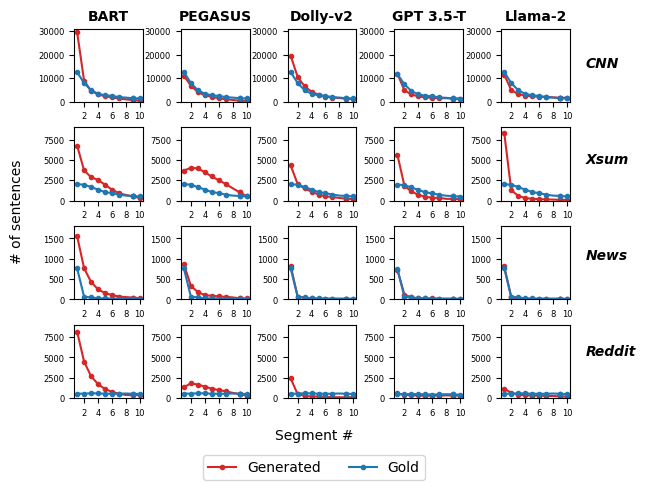

In [16]:
markers=[0,1,2,3,4,5,6,8,8,9]
x = [j for j in range(1,11)]
even_xticks = np.arange(2, 11, 2)

cnn_ticks=[0,10000,20000,30000]
xsum_ticks=[0,2500,5000,7500]
news_ticks=[0,500,1000,1500]
reddit_ticks=[0,2500,5000,7500]


fig, axs = plt.subplots(4, 5) #,sharey=True)
#fig.suptitle('Comparing Position Bias in Gold vs Generated Samples across different Models and Datasets')

cumm_list1,cumm_list2=get_lines(data_bart_none_cnn)
axs[0, 0].plot(x, cumm_list1,color='tab:red', marker='.', label="Generated", markevery=markers)
axs[0, 0].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[0, 0].set_title('BART',fontsize = 10,weight='bold')
axs[0, 0].set_xticks(even_xticks)
axs[0, 0].set_xticklabels(even_xticks, fontsize=6)
axs[0, 0].set_yticks(cnn_ticks)
axs[0, 0].set_yticklabels(cnn_ticks, fontsize=6)
axs[0, 0].set_ylim([0, 31000])
# axs[0, 0].annotate("Test", xy=(-0.55, 0.55), xycoords=axs[0, 0].transAxes, fontsize=10)





cumm_list1,cumm_list2=get_lines(data_bart_none_xsum)
axs[1, 0].plot(x, cumm_list1,color='tab:red', marker='.', label="Generated", markevery=markers)
axs[1, 0].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
#axs[1, 0].set_title('XSUM-BART',fontsize = 10)
axs[1, 0].set_xticks(even_xticks)
axs[1, 0].set_xticklabels(even_xticks, fontsize=6)
axs[1, 0].set_yticks(xsum_ticks)
axs[1, 0].set_yticklabels(xsum_ticks, fontsize=6)
axs[1, 0].set_ylim([0, 9000])


cumm_list1,cumm_list2=get_lines(data_bart_none_news)
axs[2, 0].plot(x, cumm_list1,color='tab:red', marker='.', label="Generated", markevery=markers)
axs[2, 0].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
#axs[2, 0].set_title('NEWS-BART',fontsize = 10)
axs[2, 0].set_xticks(even_xticks)
axs[2, 0].set_xticklabels(even_xticks, fontsize=6)
axs[2, 0].set_yticks(news_ticks)
axs[2, 0].set_yticklabels(news_ticks, fontsize=6)
axs[2, 0].set_ylim([0, 1800])


cumm_list1,cumm_list2=get_lines(data_bart_none_reddit)
axs[3, 0].plot(x, cumm_list1,color='tab:red', marker='.', label="Generated", markevery=markers)
axs[3, 0].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
#axs[3, 0].set_title('REDDIT-BART',fontsize = 10)
axs[3, 0].set_xticks(even_xticks)
axs[3, 0].set_xticklabels(even_xticks, fontsize=6)
axs[3, 0].set_xticklabels(even_xticks, fontsize=6)
axs[3, 0].set_yticks(reddit_ticks)
axs[3, 0].set_yticklabels(reddit_ticks, fontsize=6)
axs[3, 0].set_ylim([0, 9000])


#pegasus

cumm_list1,cumm_list2=get_lines(data_pegasus_none_cnn)
axs[0, 1].plot(x, cumm_list1,color='tab:red', marker='.', label="Generated", markevery=markers)
axs[0, 1].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[0, 1].set_title('PEGASUS',fontsize = 10,weight='bold')
axs[0, 1].set_xticks(even_xticks)
axs[0, 1].set_xticklabels(even_xticks, fontsize=6)
axs[0, 1].set_yticks(cnn_ticks)
axs[0, 1].set_yticklabels(cnn_ticks, fontsize=6)
axs[0, 1].set_ylim([0, 31000])


cumm_list1,cumm_list2=get_lines(data_pegasus_none_xsum)
axs[1, 1].plot(x, cumm_list1,color='tab:red', marker='.', label="Generated", markevery=markers)
axs[1, 1].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
#axs[1, 1].set_title('XSUM-PEGASUS',fontsize = 10)
axs[1, 1].set_xticks(even_xticks)
axs[1, 1].set_xticklabels(even_xticks, fontsize=6)
axs[1, 1].set_yticks(xsum_ticks)
axs[1, 1].set_yticklabels(xsum_ticks, fontsize=6)
axs[1, 1].set_ylim([0, 9000])


cumm_list1,cumm_list2=get_lines(data_pegasus_none_news)
axs[2, 1].plot(x, cumm_list1,color='tab:red', marker='.', label="Generated", markevery=markers)
axs[2, 1].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
#axs[2, 1].set_title('NEWS-PEGASUS',fontsize = 10)
axs[2, 1].set_xticks(even_xticks)
axs[2, 1].set_xticklabels(even_xticks, fontsize=6)
axs[2, 1].set_yticks(news_ticks)
axs[2, 1].set_yticklabels(news_ticks, fontsize=6)
axs[2, 1].set_ylim([0, 1800])


cumm_list1,cumm_list2=get_lines(data_pegasus_none_reddit)
axs[3, 1].plot(x, cumm_list1,color='tab:red', marker='.', label="Generated", markevery=markers)
axs[3, 1].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
#axs[3, 1].set_title('REDDIT-PEGASUS',fontsize = 10)
axs[3, 1].set_xticks(even_xticks)
axs[3, 1].set_xticklabels(even_xticks, fontsize=6)
axs[3, 1].set_yticks(reddit_ticks)
axs[3, 1].set_yticklabels(reddit_ticks, fontsize=6)
axs[3, 1].set_ylim([0, 9000])


#DOLLY


cumm_list1,cumm_list2=get_lines(data_dolly_cnn)
axs[0, 2].plot(x, cumm_list1,color='tab:red', marker='.', label="Generated", markevery=markers)
axs[0, 2].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[0, 2].set_title('Dolly-v2',fontsize = 10,weight='bold')
axs[0, 2].set_xticks(even_xticks)
axs[0, 2].set_xticklabels(even_xticks, fontsize=6)
axs[0, 2].set_yticks(cnn_ticks)
axs[0, 2].set_yticklabels(cnn_ticks, fontsize=6)
axs[0, 2].set_ylim([0, 31000])


cumm_list1,cumm_list2=get_lines(data_dolly_xsum)
axs[1, 2].plot(x, cumm_list1,color='tab:red', marker='.', label="Generated", markevery=markers)
axs[1, 2].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
#axs[1, 2].set_title('XSUM-DOLLY',fontsize = 10)
axs[1, 2].set_xticks(even_xticks)
axs[1, 2].set_xticklabels(even_xticks, fontsize=6)
axs[1, 2].set_yticks(xsum_ticks)
axs[1, 2].set_yticklabels(xsum_ticks, fontsize=6)
axs[1, 2].set_ylim([0, 9000])


cumm_list1,cumm_list2=get_lines(data_dolly_news)
axs[2, 2].plot(x, cumm_list1,color='tab:red', marker='.', label="Generated", markevery=markers)
axs[2, 2].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
#axs[2, 2].set_title('NEWS-DOLLY',fontsize = 10)
axs[2, 2].set_xticks(even_xticks)
axs[2, 2].set_xticklabels(even_xticks, fontsize=6)
axs[2, 2].set_yticks(news_ticks)
axs[2, 2].set_yticklabels(news_ticks, fontsize=6)
axs[2, 2].set_ylim([0, 1800])


cumm_list1,cumm_list2=get_lines(data_dolly_reddit)
axs[3, 2].plot(x, cumm_list1,color='tab:red', marker='.', label="Generated", markevery=markers)
axs[3, 2].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
#axs[3, 2].set_title('REDDIT-DOLLY',fontsize = 10)
axs[3, 2].set_xticks(even_xticks)
axs[3, 2].set_xticklabels(even_xticks, fontsize=6)
axs[3, 2].set_yticks(reddit_ticks)
axs[3, 2].set_yticklabels(reddit_ticks, fontsize=6)
axs[3, 2].set_ylim([0, 9000])


#GPT

cumm_list1,cumm_list2=get_lines(data_gpt_cnn)
axs[0, 3].plot(x, cumm_list1,color='tab:red', marker='.', label="Generated", markevery=markers)
axs[0, 3].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[0, 3].set_title('GPT 3.5-T',fontsize = 10,weight='bold')
axs[0, 3].set_xticks(even_xticks)
axs[0, 3].set_xticklabels(even_xticks, fontsize=6)
axs[0, 3].set_yticks(cnn_ticks)
axs[0, 3].set_yticklabels(cnn_ticks, fontsize=6)
axs[0, 3].set_ylim([0, 31000])


cumm_list1,cumm_list2=get_lines(data_gpt_xsum)
axs[1, 3].plot(x, cumm_list1,color='tab:red', marker='.', label="Generated", markevery=markers)
axs[1, 3].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
#axs[1, 3].set_title('XSUM-GPT3.5',fontsize = 10)
axs[1, 3].set_xticks(even_xticks)
axs[1, 3].set_xticklabels(even_xticks, fontsize=6)
axs[1, 3].set_yticks(xsum_ticks)
axs[1, 3].set_yticklabels(xsum_ticks, fontsize=6)
axs[1, 3].set_ylim([0, 9000])


cumm_list1,cumm_list2=get_lines(data_gpt_news)
axs[2, 3].plot(x, cumm_list1,color='tab:red', marker='.', label="Generated", markevery=markers)
axs[2, 3].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
#axs[2, 3].set_title('NEWS-GPT3.5',fontsize = 10)
axs[2, 3].set_xticks(even_xticks)
axs[2, 3].set_xticklabels(even_xticks, fontsize=6)
axs[2, 3].set_yticks(news_ticks)
axs[2, 3].set_yticklabels(news_ticks, fontsize=6)
axs[2, 3].set_ylim([0, 1800])


cumm_list1,cumm_list2=get_lines(data_gpt_reddit)
axs[3, 3].plot(x, cumm_list1,color='tab:red', marker='.', label="Generated", markevery=markers)
axs[3, 3].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
#axs[3, 3].set_title('REDDIT-GPT3.5',fontsize = 10)
axs[3, 3].set_xticks(even_xticks)
axs[3, 3].set_xticklabels(even_xticks, fontsize=6)
axs[3, 3].set_xticklabels(even_xticks, fontsize=6)
axs[3, 3].set_yticks(reddit_ticks)
axs[3, 3].set_yticklabels(reddit_ticks, fontsize=6)
axs[3, 3].set_ylim([0, 9000])



#LlaMa

cumm_list1,cumm_list2=get_lines(data_llama_cnn)
axs[0, 4].plot(x, cumm_list1,color='tab:red', marker='.', label="Generated", markevery=markers)
axs[0, 4].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[0, 4].set_title('Llama-2',fontsize = 10,weight='bold')
axs[0, 4].set_xticks(even_xticks)
axs[0, 4].set_xticklabels(even_xticks, fontsize=6)
axs[0, 4].set_yticks(cnn_ticks)
axs[0, 4].set_yticklabels(cnn_ticks, fontsize=6)
axs[0, 4].set_ylim([0, 31000])


cumm_list1,cumm_list2=get_lines(data_llama_xsum)
axs[1, 4].plot(x, cumm_list1,color='tab:red', marker='.', label="Generated", markevery=markers)
axs[1, 4].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
#axs[1, 4].set_title('XSUM-LlaMa',fontsize = 10)
axs[1, 4].set_xticks(even_xticks)
axs[1, 4].set_xticklabels(even_xticks, fontsize=6)
axs[1, 4].set_yticks(xsum_ticks)
axs[1, 4].set_yticklabels(xsum_ticks, fontsize=6)
axs[1, 4].set_ylim([0, 9000])


cumm_list1,cumm_list2=get_lines(data_llama_news)
axs[2, 4].plot(x, cumm_list1,color='tab:red', marker='.', label="Generated", markevery=markers)
axs[2, 4].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
#axs[2, 4].set_title('NEWS-LlaMa',fontsize = 10)
axs[2, 4].set_xticks(even_xticks)
axs[2, 4].set_xticklabels(even_xticks, fontsize=6)
axs[2, 4].set_yticks(news_ticks)
axs[2, 4].set_yticklabels(news_ticks, fontsize=6)
axs[2, 4].set_ylim([0, 1800])


cumm_list1,cumm_list2=get_lines(data_llama_reddit)
axs[3, 4].plot(x, cumm_list1,color='tab:red', marker='.', label="Generated", markevery=markers)
axs[3, 4].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
#axs[3, 4].set_title('REDDIT-LlaMa',fontsize = 10)
axs[3, 4].set_xticks(even_xticks)
axs[3, 4].set_xticklabels(even_xticks, fontsize=6)
axs[3, 4].set_yticks(reddit_ticks)
axs[3, 4].set_yticklabels(reddit_ticks, fontsize=6)
axs[3, 4].set_ylim([0, 9000])
handles, labels = axs[3, 4].get_legend_handles_labels()

# for ax in axs.flat:
#     ax.set(xlabel='Segment', ylabel='# of sentences')

# fig.supxlabel('Segment #')
# fig.supylabel('# of sentences')

fig.text(0.5, 0.025, 'Segment #', ha='center')
fig.text(0.025, 0.5, '# of sentences', va='center', rotation='vertical')
    
# for ax in axs.flat:
#     ax.label_outer()

plt.gcf().text(0.925, 0.8, "CNN", fontsize=10,style='italic',weight='bold')
plt.gcf().text(0.925, 0.6, "Xsum", fontsize=10,style='italic',weight='bold')
plt.gcf().text(0.925, 0.4, "News", fontsize=10,style='italic',weight='bold')
plt.gcf().text(0.925, 0.2, "Reddit", fontsize=10,style='italic',weight='bold')


fig.legend(handles, labels,ncol=2, loc = 'lower center',bbox_to_anchor=(0, -0.075, 1, 1), bbox_transform=plt.gcf().transFigure)
#fig.tight_layout()
# plt.gcf().text(0.02, 0.55, textstr, fontsize=14)
fig.subplots_adjust(hspace=0.35, wspace=0.55)

plt.savefig('results_with_all_axis_random.png',bbox_inches='tight')
plt.show()

In [7]:
#BART Data FineTuned

data_pegasus_cnn_cnn = datasets.load_from_disk("../pegasus/saved_models/pegasus-cnn-cnn/")
data_pegasus_xsum_cnn = datasets.load_from_disk("../pegasus/saved_models/pegasus-xsum-cnn/")
data_pegasus_news_cnn = datasets.load_from_disk("../pegasus/saved_models/pegasus-news-cnn/")
data_pegasus_reddit_cnn = datasets.load_from_disk("../pegasus/saved_models/pegasus-reddit-cnn/")

data_pegasus_cnn_xsum = datasets.load_from_disk("../pegasus/saved_models/pegasus-cnn-xsum/")
data_pegasus_xsum_xsum = datasets.load_from_disk("../pegasus/saved_models/pegasus-xsum-xsum/")
data_pegasus_news_xsum = datasets.load_from_disk("../pegasus/saved_models/pegasus-news-xsum/")
data_pegasus_reddit_xsum = datasets.load_from_disk("../pegasus/saved_models/pegasus-reddit-xsum/")

data_pegasus_cnn_news = datasets.load_from_disk("../pegasus/saved_models/pegasus-cnn-news/")
data_pegasus_xsum_news = datasets.load_from_disk("../pegasus/saved_models/pegasus-xsum-news/")
data_pegasus_news_news = datasets.load_from_disk("../pegasus/saved_models/pegasus-news-news/")
data_pegasus_reddit_news = datasets.load_from_disk("../pegasus/saved_models/pegasus-reddit-news/")

data_pegasus_cnn_reddit = datasets.load_from_disk("../pegasus/saved_models/pegasus-cnn-reddit/")
data_pegasus_xsum_reddit = datasets.load_from_disk("../pegasus/saved_models/pegasus-xsum-reddit/")
data_pegasus_news_reddit = datasets.load_from_disk("../pegasus/saved_models/pegasus-news-reddit/")
data_pegasus_reddit_reddit = datasets.load_from_disk("../pegasus/saved_models/pegasus-reddit-reddit/")

In [5]:
#Data FineTuned

data_pegasus_cnn_cnn_csv = pd.read_csv("../pegasus/results/pegasus-cnn-cnn.csv")
data_pegasus_xsum_cnn_csv = pd.read_csv("../pegasus/results/pegasus-xsum-cnn.csv")
data_pegasus_news_cnn_csv = pd.read_csv("../pegasus/results/pegasus-news-cnn.csv")
data_pegasus_reddit_cnn_csv = pd.read_csv("../pegasus/results/pegasus-reddit-cnn.csv")

data_pegasus_cnn_xsum_csv = pd.read_csv("../pegasus/results/pegasus-cnn-xsum.csv")
data_pegasus_xsum_xsum_csv = pd.read_csv("../pegasus/results/pegasus-xsum-xsum.csv")
data_pegasus_news_xsum_csv = pd.read_csv("../pegasus/results/pegasus-news-xsum.csv")
data_pegasus_reddit_xsum_csv = pd.read_csv("../pegasus/results/pegasus-reddit-xsum.csv")

data_pegasus_cnn_news_csv = pd.read_csv("../pegasus/results/pegasus-cnn-news.csv")
data_pegasus_xsum_news_csv = pd.read_csv("../pegasus/results/pegasus-xsum-news.csv")
data_pegasus_news_news_csv = pd.read_csv("../pegasus/results/pegasus-news-news.csv")
data_pegasus_reddit_news_csv = pd.read_csv("../pegasus/results/pegasus-reddit-news.csv")

data_pegasus_cnn_reddit_csv = pd.read_csv("../pegasus/results/pegasus-cnn-reddit.csv")
data_pegasus_xsum_reddit_csv = pd.read_csv("../pegasus/results/pegasus-xsum-reddit.csv")
data_pegasus_news_reddit_csv = pd.read_csv("../pegasus/results/pegasus-news-reddit.csv")
data_pegasus_reddit_reddit_csv = pd.read_csv("../pegasus/results/pegasus-reddit-reddit.csv")

In [8]:
#BART Data FineTuned

data_bart_cnn_cnn = datasets.load_from_disk("../bart/saved_models/BART-cnn-cnn/")
data_bart_xsum_cnn = datasets.load_from_disk("../bart/saved_models/BART-xsum-cnn/")
data_bart_news_cnn = datasets.load_from_disk("../bart/saved_models/BART-news-cnn/")
data_bart_reddit_cnn = datasets.load_from_disk("../bart/saved_models/BART-reddit-cnn/")

data_bart_cnn_xsum = datasets.load_from_disk("../bart/saved_models/BART-cnn-xsum/")
data_bart_xsum_xsum = datasets.load_from_disk("../bart/saved_models/BART-xsum-xsum/")
data_bart_news_xsum = datasets.load_from_disk("../bart/saved_models/BART-news-xsum/")
data_bart_reddit_xsum = datasets.load_from_disk("../bart/saved_models/BART-reddit-xsum/")

data_bart_cnn_news = datasets.load_from_disk("../bart/saved_models/BART-cnn-news/")
data_bart_xsum_news = datasets.load_from_disk("../bart/saved_models/BART-xsum-news/")
data_bart_news_news = datasets.load_from_disk("../bart/saved_models/BART-news-news/")
data_bart_reddit_news = datasets.load_from_disk("../bart/saved_models/BART-reddit-news/")

data_bart_cnn_reddit = datasets.load_from_disk("../bart/saved_models/BART-cnn-reddit/")
data_bart_xsum_reddit = datasets.load_from_disk("../bart/saved_models/BART-xsum-reddit/")
data_bart_news_reddit = datasets.load_from_disk("../bart/saved_models/BART-news-reddit/")
data_bart_reddit_reddit = datasets.load_from_disk("../bart/saved_models/BART-reddit-reddit/")

In [9]:
#Data FineTuned

data_bart_cnn_cnn_csv = pd.read_csv("../bart/results/BART-cnn-cnn.csv")
data_bart_xsum_cnn_csv = pd.read_csv("../bart/results/BART-xsum-cnn.csv")
data_bart_news_cnn_csv = pd.read_csv("../bart/results/BART-news-cnn.csv")
data_bart_reddit_cnn_csv = pd.read_csv("../bart/results/BART-reddit-cnn.csv")

data_bart_cnn_xsum_csv = pd.read_csv("../bart/results/BART-cnn-xsum.csv")
data_bart_xsum_xsum_csv = pd.read_csv("../bart/results/BART-xsum-xsum.csv")
data_bart_news_xsum_csv = pd.read_csv("../bart/results/BART-news-xsum.csv")
data_bart_reddit_xsum_csv = pd.read_csv("../bart/results/BART-reddit-xsum.csv")

data_bart_cnn_news_csv = pd.read_csv("../bart/results/BART-cnn-news.csv")
data_bart_xsum_news_csv = pd.read_csv("../bart/results/BART-xsum-news.csv")
data_bart_news_news_csv = pd.read_csv("../bart/results/BART-news-news.csv")
data_bart_reddit_news_csv = pd.read_csv("../bart/results/BART-reddit-news.csv")

data_bart_cnn_reddit_csv = pd.read_csv("../bart/results/BART-cnn-reddit.csv")
data_bart_xsum_reddit_csv = pd.read_csv("../bart/results/BART-xsum-reddit.csv")
data_bart_news_reddit_csv = pd.read_csv("../bart/results/BART-news-reddit.csv")
data_bart_reddit_reddit_csv = pd.read_csv("../bart/results/BART-reddit-reddit.csv")

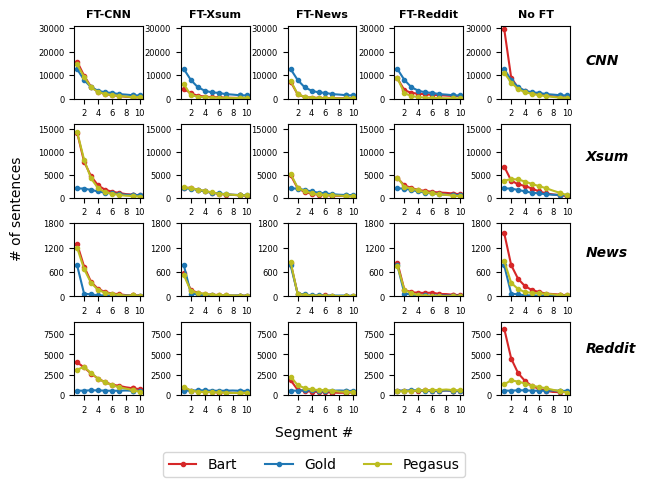

In [17]:
#Combined Plot

even_xticks = np.arange(2, 11, 2)

cnn_ticks=[0,10000,20000,30000]
xsum_ticks=[0,5000,10000,15000]
news_ticks=[0,600,1200,1800]
reddit_ticks=[0,2500,5000,7500]


fig, axs = plt.subplots(4, 5) #,sharey=True)
#fig.suptitle('Comparing Position Bias in Gold vs Generated Samples across different Models and Datasets')

cumm_list1,cumm_list2=get_lines(data_bart_cnn_cnn)
cumm_list1_peg,cumm_list2_peg=get_lines(data_pegasus_cnn_cnn)
axs[0, 0].plot(x, cumm_list1,color='tab:red', marker='.', label="Bart", markevery=markers)
axs[0, 0].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[0, 0].plot(x, cumm_list1_peg,color='tab:olive', marker='.', label="Pegasus", markevery=markers)
axs[0, 0].set_title('FT-CNN',fontsize = 8, weight='bold')
axs[0, 0].set_xticks(even_xticks)
axs[0, 0].set_xticklabels(even_xticks, fontsize=6)
axs[0, 0].set_yticks(cnn_ticks)
axs[0, 0].set_yticklabels(cnn_ticks, fontsize=6)
axs[0, 0].set_ylim([0, 31000])




cumm_list1,cumm_list2=get_lines(data_bart_cnn_xsum)
cumm_list1_peg,cumm_list2_peg=get_lines(data_pegasus_cnn_xsum)
axs[1, 0].plot(x, cumm_list1,color='tab:red', marker='.', label="Bart", markevery=markers)
axs[1, 0].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[1, 0].plot(x, cumm_list1_peg,color='tab:olive', marker='.', label="Pegasus", markevery=markers)
#axs[1, 0].set_title('XSUM-FineTunedCNN',fontsize = 8)
axs[1, 0].set_xticks(even_xticks)
axs[1, 0].set_xticklabels(even_xticks, fontsize=6)
axs[1, 0].set_yticks(xsum_ticks)
axs[1, 0].set_yticklabels(xsum_ticks, fontsize=6)
axs[1, 0].set_ylim([0, 16000])


cumm_list1,cumm_list2=get_lines(data_bart_cnn_news)
cumm_list1_peg,cumm_list2_peg=get_lines(data_pegasus_cnn_news)
axs[2, 0].plot(x, cumm_list1,color='tab:red', marker='.', label="Bart", markevery=markers)
axs[2, 0].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[2, 0].plot(x, cumm_list1_peg,color='tab:olive', marker='.', label="Pegasus", markevery=markers)
#axs[2, 0].set_title('NEWS-FineTunedCNN',fontsize = 8)
axs[2, 0].set_xticks(even_xticks)
axs[2, 0].set_xticklabels(even_xticks, fontsize=6)
axs[2, 0].set_yticks(news_ticks)
axs[2, 0].set_yticklabels(news_ticks, fontsize=6)
axs[2, 0].set_ylim([0, 1800])


cumm_list1,cumm_list2=get_lines(data_bart_cnn_reddit)
cumm_list1_peg,cumm_list2_peg=get_lines(data_pegasus_cnn_reddit)
axs[3, 0].plot(x, cumm_list1,color='tab:red', marker='.', label="Bart", markevery=markers)
axs[3, 0].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[3, 0].plot(x, cumm_list1_peg,color='tab:olive', marker='.', label="Pegasus", markevery=markers)
#axs[3, 0].set_title('REDDIT-FinetunedCNN',fontsize = 8)
axs[3, 0].set_xticks(even_xticks)
axs[3, 0].set_xticklabels(even_xticks, fontsize=6)
axs[3, 0].set_yticks(reddit_ticks)
axs[3, 0].set_yticklabels(reddit_ticks, fontsize=6)
axs[3, 0].set_ylim([0, 9000])


#Xsum

cumm_list1,cumm_list2=get_lines(data_bart_xsum_cnn)
cumm_list1_peg,cumm_list2_peg=get_lines(data_pegasus_xsum_cnn)
axs[0, 1].plot(x, cumm_list1,color='tab:red', marker='.', label="Bart", markevery=markers)
axs[0, 1].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[0, 1].plot(x, cumm_list1_peg,color='tab:olive', marker='.', label="Pegasus", markevery=markers)
axs[0, 1].set_title('FT-Xsum',fontsize = 8, weight='bold')
axs[0, 1].set_xticks(even_xticks)
axs[0, 1].set_xticklabels(even_xticks, fontsize=6)
axs[0, 1].set_yticks(cnn_ticks)
axs[0, 1].set_yticklabels(cnn_ticks, fontsize=6)
axs[0, 1].set_ylim([0, 31000])


cumm_list1,cumm_list2=get_lines(data_bart_xsum_xsum)
cumm_list1_peg,cumm_list2_peg=get_lines(data_pegasus_xsum_xsum)
axs[1, 1].plot(x, cumm_list1,color='tab:red', marker='.', label="Bart", markevery=markers)
axs[1, 1].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[1, 1].plot(x, cumm_list1_peg,color='tab:olive', marker='.', label="Pegasus", markevery=markers)
#axs[1, 1].set_title('XSUM-FinetunedCNN',fontsize = 8)
axs[1, 1].set_xticks(even_xticks)
axs[1, 1].set_xticklabels(even_xticks, fontsize=6)
axs[1, 1].set_yticks(xsum_ticks)
axs[1, 1].set_yticklabels(xsum_ticks, fontsize=6)
axs[1, 1].set_ylim([0, 16000])


cumm_list1,cumm_list2=get_lines(data_bart_xsum_news)
cumm_list1_peg,cumm_list2_peg=get_lines(data_pegasus_xsum_news)
axs[2, 1].plot(x, cumm_list1,color='tab:red', marker='.', label="Bart", markevery=markers)
axs[2, 1].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[2, 1].plot(x, cumm_list1_peg,color='tab:olive', marker='.', label="Pegasus", markevery=markers)
#axs[2, 1].set_title('NEWS-FinetunedCNN',fontsize = 8)
axs[2, 1].set_xticks(even_xticks)
axs[2, 1].set_xticklabels(even_xticks, fontsize=6)
axs[2, 1].set_yticks(news_ticks)
axs[2, 1].set_yticklabels(news_ticks, fontsize=6)
axs[2, 1].set_ylim([0, 1800])


cumm_list1,cumm_list2=get_lines(data_bart_xsum_reddit)
cumm_list1_peg,cumm_list2_peg=get_lines(data_pegasus_xsum_reddit)
axs[3, 1].plot(x, cumm_list1,color='tab:red', marker='.', label="Bart", markevery=markers)
axs[3, 1].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[3, 1].plot(x, cumm_list1_peg,color='tab:olive', marker='.', label="Pegasus", markevery=markers)
#axs[3, 1].set_title('REDDIT-FinetunedCNN',fontsize = 8)
axs[3, 1].set_xticks(even_xticks)
axs[3, 1].set_xticklabels(even_xticks, fontsize=6)
axs[3, 1].set_yticks(reddit_ticks)
axs[3, 1].set_yticklabels(reddit_ticks, fontsize=6)
axs[3, 1].set_ylim([0, 9000])


#News


cumm_list1,cumm_list2=get_lines(data_bart_news_cnn)
cumm_list1_peg,cumm_list2_peg=get_lines(data_pegasus_news_cnn)
axs[0, 2].plot(x, cumm_list1,color='tab:red', marker='.', label="Bart", markevery=markers)
axs[0, 2].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[0, 2].plot(x, cumm_list1_peg,color='tab:olive', marker='.', label="Pegasus", markevery=markers)
axs[0, 2].set_title('FT-News',fontsize = 8,weight='bold')
axs[0, 2].set_xticks(even_xticks)
axs[0, 2].set_xticklabels(even_xticks, fontsize=6)
axs[0, 2].set_yticks(cnn_ticks)
axs[0, 2].set_yticklabels(cnn_ticks, fontsize=6)
axs[0, 2].set_ylim([0, 31000])


cumm_list1,cumm_list2=get_lines(data_bart_news_xsum)
cumm_list1_peg,cumm_list2_peg=get_lines(data_pegasus_news_xsum)
axs[1, 2].plot(x, cumm_list1,color='tab:red', marker='.', label="Bart", markevery=markers)
axs[1, 2].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[1, 2].plot(x, cumm_list1_peg,color='tab:olive', marker='.', label="Pegasus", markevery=markers)
#axs[1, 2].set_title('XSUM-FinetunedCNN',fontsize = 8)
axs[1, 2].set_xticks(even_xticks)
axs[1, 2].set_xticklabels(even_xticks, fontsize=6)
axs[1, 2].set_yticks(xsum_ticks)
axs[1, 2].set_yticklabels(xsum_ticks, fontsize=6)
axs[1, 2].set_ylim([0, 16000])


cumm_list1,cumm_list2=get_lines(data_bart_news_news)
cumm_list1_peg,cumm_list2_peg=get_lines(data_pegasus_news_news)
axs[2, 2].plot(x, cumm_list1,color='tab:red', marker='.', label="Bart", markevery=markers)
axs[2, 2].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[2, 2].plot(x, cumm_list1_peg,color='tab:olive', marker='.', label="Pegasus", markevery=markers)
#axs[2, 2].set_title('NEWS-FinetunedCNN',fontsize = 8)
axs[2, 2].set_xticks(even_xticks)
axs[2, 2].set_xticklabels(even_xticks, fontsize=6)
axs[2, 2].set_yticks(news_ticks)
axs[2, 2].set_yticklabels(news_ticks, fontsize=6)
axs[2, 2].set_ylim([0, 1800])


cumm_list1,cumm_list2=get_lines(data_bart_news_reddit)
cumm_list1_peg,cumm_list2_peg=get_lines(data_pegasus_news_reddit)
axs[3, 2].plot(x, cumm_list1,color='tab:red', marker='.', label="Bart", markevery=markers)
axs[3, 2].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[3, 2].plot(x, cumm_list1_peg,color='tab:olive', marker='.', label="Pegasus", markevery=markers)
#axs[3, 2].set_title('REDDIT-FinetunedCNN',fontsize = 8)
axs[3, 2].set_xticks(even_xticks)
axs[3, 2].set_xticklabels(even_xticks, fontsize=6)
axs[3, 2].set_yticks(reddit_ticks)
axs[3, 2].set_yticklabels(reddit_ticks, fontsize=6)
axs[3, 2].set_ylim([0, 9000])


#Reddit

cumm_list1,cumm_list2=get_lines(data_bart_reddit_cnn)
cumm_list1_peg,cumm_list2_peg=get_lines(data_pegasus_reddit_cnn)
axs[0, 3].plot(x, cumm_list1,color='tab:red', marker='.', label="Bart", markevery=markers)
axs[0, 3].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[0, 3].plot(x, cumm_list1_peg,color='tab:olive', marker='.', label="Pegasus", markevery=markers)
axs[0, 3].set_title('FT-Reddit',fontsize = 8,weight='bold')
axs[0, 3].set_xticks(even_xticks)
axs[0, 3].set_xticklabels(even_xticks, fontsize=6)
axs[0, 3].set_yticks(cnn_ticks)
axs[0, 3].set_yticklabels(cnn_ticks, fontsize=6)
axs[0, 3].set_ylim([0, 31000])


cumm_list1,cumm_list2=get_lines(data_bart_reddit_xsum)
cumm_list1_peg,cumm_list2_peg=get_lines(data_pegasus_reddit_xsum)
axs[1, 3].plot(x, cumm_list1,color='tab:red', marker='.', label="Bart", markevery=markers)
axs[1, 3].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[1, 3].plot(x, cumm_list1_peg,color='tab:olive', marker='.', label="Pegasus", markevery=markers)
#axs[1, 3].set_title('XSUM-FinetunedCNN',fontsize = 8)
axs[1, 3].set_xticks(even_xticks)
axs[1, 3].set_xticklabels(even_xticks, fontsize=6)
axs[1, 3].set_yticks(xsum_ticks)
axs[1, 3].set_yticklabels(xsum_ticks, fontsize=6)
axs[1, 3].set_ylim([0, 16000])


cumm_list1,cumm_list2=get_lines(data_bart_reddit_news)
cumm_list1_peg,cumm_list2_peg=get_lines(data_pegasus_reddit_news)
axs[2, 3].plot(x, cumm_list1,color='tab:red', marker='.', label="Bart", markevery=markers)
axs[2, 3].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[2, 3].plot(x, cumm_list1_peg,color='tab:olive', marker='.', label="Pegasus", markevery=markers)
#axs[2, 3].set_title('NEWS-FinetunedCNN',fontsize = 8)
axs[2, 3].set_xticks(even_xticks)
axs[2, 3].set_xticklabels(even_xticks, fontsize=6)
axs[2, 3].set_yticks(news_ticks)
axs[2, 3].set_yticklabels(news_ticks, fontsize=6)
axs[2, 3].set_ylim([0, 1800])


cumm_list1,cumm_list2=get_lines(data_bart_reddit_reddit)
cumm_list1_peg,cumm_list2_peg=get_lines(data_pegasus_reddit_reddit)
axs[3, 3].plot(x, cumm_list1,color='tab:red', marker='.', label="Bart", markevery=markers)
axs[3, 3].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[3, 3].plot(x, cumm_list1_peg,color='tab:olive', marker='.', label="Pegasus", markevery=markers)
#axs[3, 3].set_title('REDDIT-FinetunedCNN',fontsize = 8)
axs[3, 3].set_xticks(even_xticks)
axs[3, 3].set_xticklabels(even_xticks, fontsize=6)
axs[3, 3].set_yticks(reddit_ticks)
axs[3, 3].set_yticklabels(reddit_ticks, fontsize=6)
axs[3, 3].set_ylim([0, 9000])
#handles, labels = axs[3, 3].get_legend_handles_labels()

#None

cumm_list1,cumm_list2=get_lines(data_bart_none_cnn)
cumm_list1_peg,cumm_list2_peg=get_lines(data_pegasus_none_cnn)
axs[0, 4].plot(x, cumm_list1,color='tab:red', marker='.', label="Bart", markevery=markers)
axs[0, 4].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[0, 4].plot(x, cumm_list1_peg,color='tab:olive', marker='.', label="Pegasus", markevery=markers)
axs[0, 4].set_title('No FT',fontsize = 8, weight='bold')
axs[0, 4].set_xticks(even_xticks)
axs[0, 4].set_xticklabels(even_xticks, fontsize=6)
axs[0, 4].set_yticks(cnn_ticks)
axs[0, 4].set_yticklabels(cnn_ticks, fontsize=6)
axs[0, 4].set_ylim([0, 31000])


cumm_list1,cumm_list2=get_lines(data_bart_none_xsum)
cumm_list1_peg,cumm_list2_peg=get_lines(data_pegasus_none_xsum)
axs[1, 4].plot(x, cumm_list1,color='tab:red', marker='.', label="Bart", markevery=markers)
axs[1, 4].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[1, 4].plot(x, cumm_list1_peg,color='tab:olive', marker='.', label="Pegasus", markevery=markers)
#axs[1, 4].set_title('No Finetuning',fontsize = 8)
axs[1, 4].set_xticks(even_xticks)
axs[1, 4].set_xticklabels(even_xticks, fontsize=6)
axs[1, 4].set_yticks(xsum_ticks)
axs[1, 4].set_yticklabels(xsum_ticks, fontsize=6)
axs[1, 4].set_ylim([0, 16000])


cumm_list1,cumm_list2=get_lines(data_bart_none_news)
cumm_list1_peg,cumm_list2_peg=get_lines(data_pegasus_none_news)
axs[2, 4].plot(x, cumm_list1,color='tab:red', marker='.', label="Bart", markevery=markers)
axs[2, 4].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[2, 4].plot(x, cumm_list1_peg,color='tab:olive', marker='.', label="Pegasus", markevery=markers)
#axs[2, 4].set_title('No Finetuning',fontsize = 8)
axs[2, 4].set_xticks(even_xticks)
axs[2, 4].set_xticklabels(even_xticks, fontsize=6)
axs[2, 4].set_yticks(news_ticks)
axs[2, 4].set_yticklabels(news_ticks, fontsize=6)
axs[2, 4].set_ylim([0, 1800])


cumm_list1,cumm_list2=get_lines(data_bart_none_reddit)
cumm_list1_peg,cumm_list2_peg=get_lines(data_pegasus_none_reddit)
axs[3, 4].plot(x, cumm_list1,color='tab:red', marker='.', label="Bart", markevery=markers)
axs[3, 4].plot(x, cumm_list2,color='tab:blue', marker='.', label="Gold", markevery=markers)
axs[3, 4].plot(x, cumm_list1_peg,color='tab:olive', marker='.', label="Pegasus", markevery=markers)
#axs[3, 4].set_title('No Finetuning',fontsize = 8)
axs[3, 4].set_xticks(even_xticks)
axs[3, 4].set_xticklabels(even_xticks, fontsize=6)
axs[3, 4].set_yticks(reddit_ticks)
axs[3, 4].set_yticklabels(reddit_ticks, fontsize=6)
axs[3, 4].set_ylim([0, 9000])
handles, labels = axs[3, 4].get_legend_handles_labels()




fig.text(0.5, 0.025, 'Segment #', ha='center')
fig.text(0.025, 0.5, '# of sentences', va='center', rotation='vertical')
    

plt.gcf().text(0.925, 0.8, "CNN", fontsize=10,style='italic',weight='bold')
plt.gcf().text(0.925, 0.6, "Xsum", fontsize=10,style='italic',weight='bold')
plt.gcf().text(0.925, 0.4, "News", fontsize=10,style='italic',weight='bold')
plt.gcf().text(0.925, 0.2, "Reddit", fontsize=10,style='italic',weight='bold')


fig.legend(handles, labels, loc = 'lower center',bbox_to_anchor=(0, -0.075, 1, 1), bbox_transform=plt.gcf().transFigure, ncol=3)
#fig.tight_layout()
fig.subplots_adjust(hspace=0.35, wspace=0.55)

plt.savefig('finetuned-combined-results_with_all_axis.png',bbox_inches='tight')
plt.show()

    

In [8]:
def get_rouge(df):
    return df['rouge1'].to_list()[0]

In [1]:
def get_rouge2(df):
    return df['rouge2'].to_list()[0]

In [2]:
def get_rougeL(df):
    return df['rougeL'].to_list()[0]

In [9]:
def get_wass(data):

    cumm_list1 = [0]*10
    cumm_list2 = [0]*10

    for ind, da in enumerate(data):
        y1 = da['mapping_gen']
    #     print(y)
        cumm_list1 = [a+b for a,b in zip(cumm_list1, y1)]
        y2 = da['mapping']
    #     print(y)
        cumm_list2 = [a+b for a,b in zip(cumm_list2, y2)]
   
    wasse=wass(np.array(cumm_list1)/np.sum(cumm_list1), np.array(cumm_list2)/np.sum(cumm_list2))
    return wasse

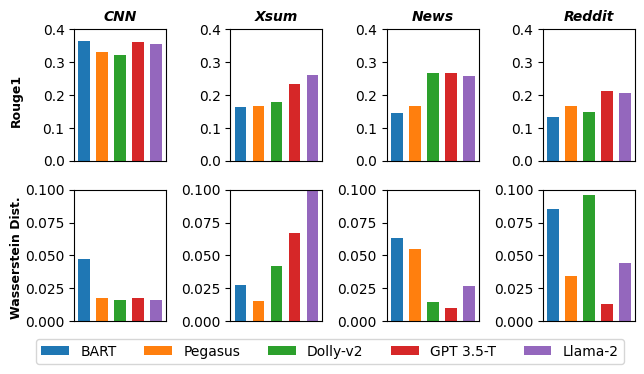

In [10]:
#Bar Plot Code
fig, axs = plt.subplots(2, 4) #,sharey=True)
fig.set_figheight(3.5)
#fig.suptitle('Comparing Position Bias in Gold vs Generated Samples across different Models and Datasets')


x=['BART', 'Pegasus', 'Dolly-v2', 'GPT 3.5-T', 'Llama-2']
values=[]
values.append(get_rouge(data_bart_none_cnn_csv))
values.append(get_rouge(data_pegasus_none_cnn_csv))
values.append(get_rouge(data_dolly_cnn_csv))
values.append(get_rouge(data_gpt_cnn_csv))
values.append(get_rouge(data_llama_cnn_csv))
axs[0,0].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[0,0].set_ylim(0,0.4)
axs[0, 0].set_title('CNN',fontsize = 10,weight='bold',style='italic')
axs[0,0].get_xaxis().set_ticks([])


values=[]
values.append(get_rouge(data_bart_none_xsum_csv))
values.append(get_rouge(data_pegasus_none_xsum_csv))
values.append(get_rouge(data_dolly_xsum_csv))
values.append(get_rouge(data_gpt_xsum_csv))
values.append(get_rouge(data_llama_xsum_csv))
axs[0,1].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[0,1].set_ylim(0,0.4)
axs[0, 1].set_title('Xsum',fontsize = 10,weight='bold',style='italic')
axs[0,1].get_xaxis().set_ticks([])


values=[]
values.append(get_rouge(data_bart_none_news_csv))
values.append(get_rouge(data_pegasus_none_news_csv))
values.append(get_rouge(data_dolly_news_csv))
values.append(get_rouge(data_gpt_news_csv))
values.append(get_rouge(data_llama_news_csv))
axs[0,2].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[0,2].set_ylim(0,0.4)
axs[0, 2].set_title('News',fontsize = 10,weight='bold',style='italic')
axs[0,2].get_xaxis().set_ticks([])

values=[]
values.append(get_rouge(data_bart_none_reddit_csv))
values.append(get_rouge(data_pegasus_none_reddit_csv))
values.append(get_rouge(data_dolly_reddit_csv))
values.append(get_rouge(data_gpt_reddit_csv))
values.append(get_rouge(data_llama_reddit_csv))
axs[0,3].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[0,3].set_ylim(0,0.4)
axs[0, 3].set_title('Reddit',fontsize = 10,weight='bold',style='italic')
axs[0,3].get_xaxis().set_ticks([])




x=['BART', 'Pegasus', 'Dolly-v2', 'GPT 3.5-T', 'Llama-2']
values=[]
values.append(get_wass(data_bart_none_cnn))
values.append(get_wass(data_pegasus_none_cnn))
values.append(get_wass(data_dolly_cnn))
values.append(get_wass(data_gpt_cnn))
values.append(get_wass(data_llama_cnn))
axs[1,0].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[1,0].set_ylim(0,0.1)
axs[1,0].get_xaxis().set_ticks([])




values=[]
values.append(get_wass(data_bart_none_xsum))
values.append(get_wass(data_pegasus_none_xsum))
values.append(get_wass(data_dolly_xsum))
values.append(get_wass(data_gpt_xsum))
values.append(get_wass(data_llama_xsum))
axs[1,1].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[1,1].set_ylim(0,0.1)
axs[1,1].get_xaxis().set_ticks([])




values=[]
values.append(get_wass(data_bart_none_news))
values.append(get_wass(data_pegasus_none_news))
values.append(get_wass(data_dolly_news))
values.append(get_wass(data_gpt_news))
values.append(get_wass(data_llama_news))
axs[1,2].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[1,2].set_ylim(0,0.1)
axs[1,2].get_xaxis().set_ticks([])



values=[]
values.append(get_wass(data_bart_none_reddit))
values.append(get_wass(data_pegasus_none_reddit))
values.append(get_wass(data_dolly_reddit))
values.append(get_wass(data_gpt_reddit))
values.append(get_wass(data_llama_reddit))
axs[1,3].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[1,3].set_ylim(0,0.1)
axs[1,3].get_xaxis().set_ticks([])



# values=[]
# values.append(get_wass(data_llama_cnn))
# values.append(get_wass(data_llama_xsum))
# values.append(get_wass(data_llama_news))
# values.append(get_wass(data_llama_reddit))
# axs[1,4].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
# axs[1,4].set_ylim(0,0.15)
# axs[1,4].get_xaxis().set_ticks([])

handles, labels = axs[1, 3].get_legend_handles_labels()

# for ax in axs.flat:
#     ax.set(xlabel='Segment', ylabel='# of sentences')

# fig.supxlabel('Segment #')
# fig.supylabel('# of sentences')

#fig.text(0.55, 0, 'Datasets', ha='center')
fig.text(0, 0.70, 'Rouge1', va='center', rotation='vertical', weight='bold',fontsize=9)
fig.text(0, 0.25, 'Wasserstein Dist.', va='center', rotation='vertical', weight='bold',fontsize=9)
    
# for ax in axs.flat:
#     ax.label_outer()

# plt.gcf().text(-0.1585, 0.65, "Rouge1", fontsize=10,style='italic',weight='bold')
# plt.gcf().text(-0.1585, 0.25, "Wass Div", fontsize=10,style='italic',weight='bold')

#axs[0,0].tick_params(axis='both', which='minor', labelsize=4)

#fig.legend()
fig.legend(handles, labels,ncol=5, loc = 'lower center',bbox_to_anchor=(0, -0.075, 1, 1), bbox_transform=plt.gcf().transFigure)
fig.tight_layout()
# plt.gcf().text(0.02, 0.55, textstr, fontsize=14)

plt.savefig('LLMs_bar.png',bbox_inches='tight')
plt.show()



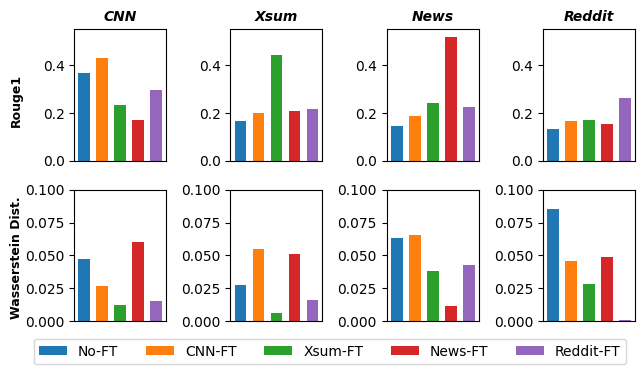

In [61]:
#Bar Plot Code
fig, axs = plt.subplots(2, 4) #,sharey=True)
fig.set_figheight(3.5)
#fig.suptitle('Comparing Position Bias in Gold vs Generated Samples across different Models and Datasets')


x=['No-FT', 'CNN-FT', 'Xsum-FT', 'News-FT', 'Reddit-FT']
values=[]
values.append(get_rouge(data_bart_none_cnn_csv))
values.append(get_rouge(data_bart_cnn_cnn_csv))
values.append(get_rouge(data_bart_xsum_cnn_csv))
values.append(get_rouge(data_bart_news_cnn_csv))
values.append(get_rouge(data_bart_reddit_cnn_csv))
axs[0,0].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[0,0].set_ylim(0,0.55)
axs[0, 0].set_title('CNN',fontsize = 10,weight='bold',style='italic')
axs[0,0].get_xaxis().set_ticks([])


values=[]
values.append(get_rouge(data_bart_none_xsum_csv))
values.append(get_rouge(data_bart_cnn_xsum_csv))
values.append(get_rouge(data_bart_xsum_xsum_csv))
values.append(get_rouge(data_bart_news_xsum_csv))
values.append(get_rouge(data_bart_reddit_xsum_csv))
axs[0,1].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[0,1].set_ylim(0,0.55)
axs[0, 1].set_title('Xsum',fontsize = 10,weight='bold',style='italic')
axs[0,1].get_xaxis().set_ticks([])


values=[]
values.append(get_rouge(data_bart_none_news_csv))
values.append(get_rouge(data_bart_cnn_news_csv))
values.append(get_rouge(data_bart_xsum_news_csv))
values.append(get_rouge(data_bart_news_news_csv))
values.append(get_rouge(data_bart_reddit_news_csv))
axs[0,2].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[0,2].set_ylim(0,0.55)
axs[0, 2].set_title('News',fontsize = 10,weight='bold',style='italic')
axs[0,2].get_xaxis().set_ticks([])

values=[]
values.append(get_rouge(data_bart_none_reddit_csv))
values.append(get_rouge(data_bart_cnn_reddit_csv))
values.append(get_rouge(data_bart_xsum_reddit_csv))
values.append(get_rouge(data_bart_news_reddit_csv))
values.append(get_rouge(data_bart_reddit_reddit_csv))
axs[0,3].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[0,3].set_ylim(0,0.55)
axs[0, 3].set_title('Reddit',fontsize = 10,weight='bold',style='italic')
axs[0,3].get_xaxis().set_ticks([])




x=['No-FT', 'CNN-FT', 'Xsum-FT', 'News-FT', 'Reddit-FT']
values=[]
values.append(get_wass(data_bart_none_cnn))
values.append(get_wass(data_bart_cnn_cnn))
values.append(get_wass(data_bart_xsum_cnn))
values.append(get_wass(data_bart_news_cnn))
values.append(get_wass(data_bart_reddit_cnn))
axs[1,0].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[1,0].set_ylim(0,0.1)
axs[1,0].get_xaxis().set_ticks([])




values=[]
values.append(get_wass(data_bart_none_xsum))
values.append(get_wass(data_bart_cnn_xsum))
values.append(get_wass(data_bart_xsum_xsum))
values.append(get_wass(data_bart_news_xsum))
values.append(get_wass(data_bart_reddit_xsum))
axs[1,1].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[1,1].set_ylim(0,0.1)
axs[1,1].get_xaxis().set_ticks([])




values=[]
values.append(get_wass(data_bart_none_news))
values.append(get_wass(data_bart_cnn_news))
values.append(get_wass(data_bart_xsum_news))
values.append(get_wass(data_bart_news_news))
values.append(get_wass(data_bart_reddit_news))
axs[1,2].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[1,2].set_ylim(0,0.1)
axs[1,2].get_xaxis().set_ticks([])



values=[]
values.append(get_wass(data_bart_none_reddit))
values.append(get_wass(data_bart_cnn_reddit))
values.append(get_wass(data_bart_xsum_reddit))
values.append(get_wass(data_bart_news_reddit))
values.append(get_wass(data_bart_reddit_reddit))
axs[1,3].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[1,3].set_ylim(0,0.1)
axs[1,3].get_xaxis().set_ticks([])



# values=[]
# values.append(get_wass(data_llama_cnn))
# values.append(get_wass(data_llama_xsum))
# values.append(get_wass(data_llama_news))
# values.append(get_wass(data_llama_reddit))
# axs[1,4].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
# axs[1,4].set_ylim(0,0.15)
# axs[1,4].get_xaxis().set_ticks([])

handles, labels = axs[1, 3].get_legend_handles_labels()

# for ax in axs.flat:
#     ax.set(xlabel='Segment', ylabel='# of sentences')

# fig.supxlabel('Segment #')
# fig.supylabel('# of sentences')

#fig.text(0.55, 0, 'Datasets', ha='center')
fig.text(0, 0.70, 'Rouge1', va='center', rotation='vertical', weight='bold',fontsize=9)
fig.text(0, 0.25, 'Wasserstein Dist.', va='center', rotation='vertical', weight='bold',fontsize=9)
    
# for ax in axs.flat:
#     ax.label_outer()

# plt.gcf().text(-0.1585, 0.65, "Rouge1", fontsize=10,style='italic',weight='bold')
# plt.gcf().text(-0.1585, 0.25, "Wass Div", fontsize=10,style='italic',weight='bold')

#axs[0,0].tick_params(axis='both', which='minor', labelsize=4)

#fig.legend()
fig.legend(handles, labels,ncol=5, loc = 'lower center',bbox_to_anchor=(0, -0.075, 1, 1), bbox_transform=plt.gcf().transFigure)
fig.tight_layout()
# plt.gcf().text(0.02, 0.55, textstr, fontsize=14)

plt.savefig('bar-bart_results_with_all_axis_random_wass.png',bbox_inches='tight')
plt.show()



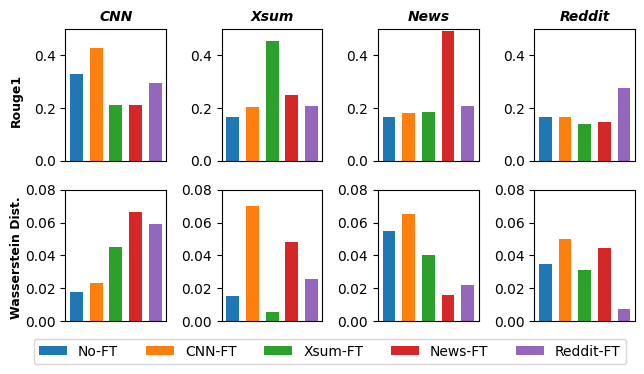

In [63]:
#Bar Plot Code
fig, axs = plt.subplots(2, 4) #,sharey=True)
fig.set_figheight(3.5)
#fig.suptitle('Comparing Position Bias in Gold vs Generated Samples across different Models and Datasets')


x=['No-FT', 'CNN-FT', 'Xsum-FT', 'News-FT', 'Reddit-FT']
values=[]
values.append(get_rouge(data_pegasus_none_cnn_csv))
values.append(get_rouge(data_pegasus_cnn_cnn_csv))
values.append(get_rouge(data_pegasus_xsum_cnn_csv))
values.append(get_rouge(data_pegasus_news_cnn_csv))
values.append(get_rouge(data_pegasus_reddit_cnn_csv))
axs[0,0].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[0,0].set_ylim(0,0.5)
axs[0, 0].set_title('CNN',fontsize = 10,weight='bold',style='italic')
axs[0,0].get_xaxis().set_ticks([])


values=[]
values.append(get_rouge(data_pegasus_none_xsum_csv))
values.append(get_rouge(data_pegasus_cnn_xsum_csv))
values.append(get_rouge(data_pegasus_xsum_xsum_csv))
values.append(get_rouge(data_pegasus_news_xsum_csv))
values.append(get_rouge(data_pegasus_reddit_xsum_csv))
axs[0,1].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[0,1].set_ylim(0,0.5)
axs[0, 1].set_title('Xsum',fontsize = 10,weight='bold',style='italic')
axs[0,1].get_xaxis().set_ticks([])


values=[]
values.append(get_rouge(data_pegasus_none_news_csv))
values.append(get_rouge(data_pegasus_cnn_news_csv))
values.append(get_rouge(data_pegasus_xsum_news_csv))
values.append(get_rouge(data_pegasus_news_news_csv))
values.append(get_rouge(data_pegasus_reddit_news_csv))
axs[0,2].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[0,2].set_ylim(0,0.5)
axs[0, 2].set_title('News',fontsize = 10,weight='bold',style='italic')
axs[0,2].get_xaxis().set_ticks([])

values=[]
values.append(get_rouge(data_pegasus_none_reddit_csv))
values.append(get_rouge(data_pegasus_cnn_reddit_csv))
values.append(get_rouge(data_pegasus_xsum_reddit_csv))
values.append(get_rouge(data_pegasus_news_reddit_csv))
values.append(get_rouge(data_pegasus_reddit_reddit_csv))
axs[0,3].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[0,3].set_ylim(0,0.5)
axs[0, 3].set_title('Reddit',fontsize = 10,weight='bold',style='italic')
axs[0,3].get_xaxis().set_ticks([])




x=['No-FT', 'CNN-FT', 'Xsum-FT', 'News-FT', 'Reddit-FT']
values=[]
values.append(get_wass(data_pegasus_none_cnn))
values.append(get_wass(data_pegasus_cnn_cnn))
values.append(get_wass(data_pegasus_xsum_cnn))
values.append(get_wass(data_pegasus_news_cnn))
values.append(get_wass(data_pegasus_reddit_cnn))
axs[1,0].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[1,0].set_ylim(0,0.08)
axs[1,0].get_xaxis().set_ticks([])




values=[]
values.append(get_wass(data_pegasus_none_xsum))
values.append(get_wass(data_pegasus_cnn_xsum))
values.append(get_wass(data_pegasus_xsum_xsum))
values.append(get_wass(data_pegasus_news_xsum))
values.append(get_wass(data_pegasus_reddit_xsum))
axs[1,1].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[1,1].set_ylim(0,0.08)
axs[1,1].get_xaxis().set_ticks([])




values=[]
values.append(get_wass(data_pegasus_none_news))
values.append(get_wass(data_pegasus_cnn_news))
values.append(get_wass(data_pegasus_xsum_news))
values.append(get_wass(data_pegasus_news_news))
values.append(get_wass(data_pegasus_reddit_news))
axs[1,2].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[1,2].set_ylim(0,0.08)
axs[1,2].get_xaxis().set_ticks([])



values=[]
values.append(get_wass(data_pegasus_none_reddit))
values.append(get_wass(data_pegasus_cnn_reddit))
values.append(get_wass(data_pegasus_xsum_reddit))
values.append(get_wass(data_pegasus_news_reddit))
values.append(get_wass(data_pegasus_reddit_reddit))
axs[1,3].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[1,3].set_ylim(0,0.08)
axs[1,3].get_xaxis().set_ticks([])



# values=[]
# values.append(get_wass(data_llama_cnn))
# values.append(get_wass(data_llama_xsum))
# values.append(get_wass(data_llama_news))
# values.append(get_wass(data_llama_reddit))
# axs[1,4].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
# axs[1,4].set_ylim(0,0.15)
# axs[1,4].get_xaxis().set_ticks([])

handles, labels = axs[1, 3].get_legend_handles_labels()

# for ax in axs.flat:
#     ax.set(xlabel='Segment', ylabel='# of sentences')

# fig.supxlabel('Segment #')
# fig.supylabel('# of sentences')

#fig.text(0.55, 0, 'Datasets', ha='center')
fig.text(0, 0.70, 'Rouge1', va='center', rotation='vertical', weight='bold',fontsize=9)
fig.text(0, 0.25, 'Wasserstein Dist.', va='center', rotation='vertical', weight='bold',fontsize=9)
    
# for ax in axs.flat:
#     ax.label_outer()

# plt.gcf().text(-0.1585, 0.65, "Rouge1", fontsize=10,style='italic',weight='bold')
# plt.gcf().text(-0.1585, 0.25, "Wass Div", fontsize=10,style='italic',weight='bold')

#axs[0,0].tick_params(axis='both', which='minor', labelsize=4)

#fig.legend()
fig.legend(handles, labels,ncol=5, loc = 'lower center',bbox_to_anchor=(0, -0.075, 1, 1), bbox_transform=plt.gcf().transFigure)
fig.tight_layout()
# plt.gcf().text(0.02, 0.55, textstr, fontsize=14)

plt.savefig('bar-pegasus_results_with_all_axis_random_wass.png',bbox_inches='tight')
plt.show()



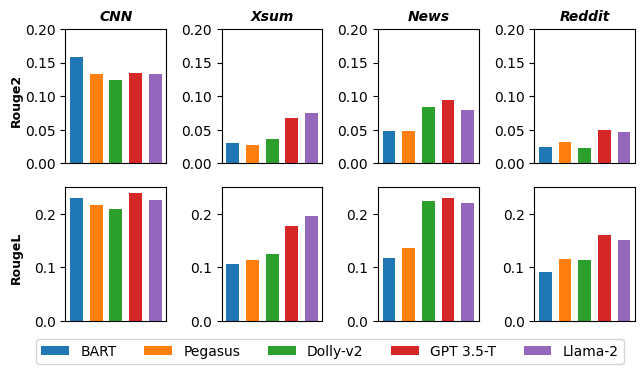

In [12]:
#Bar Plot Code
fig, axs = plt.subplots(2, 4) #,sharey=True)
fig.set_figheight(3.5)
#fig.suptitle('Comparing Position Bias in Gold vs Generated Samples across different Models and Datasets')


x=['BART', 'Pegasus', 'Dolly-v2', 'GPT 3.5-T', 'Llama-2']
values=[]
values.append(get_rouge2(data_bart_none_cnn_csv))
values.append(get_rouge2(data_pegasus_none_cnn_csv))
values.append(get_rouge2(data_dolly_cnn_csv))
values.append(get_rouge2(data_gpt_cnn_csv))
values.append(get_rouge2(data_llama_cnn_csv))
axs[0,0].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[0,0].set_ylim(0,0.2)
axs[0, 0].set_title('CNN',fontsize = 10,weight='bold',style='italic')
axs[0,0].get_xaxis().set_ticks([])


values=[]
values.append(get_rouge2(data_bart_none_xsum_csv))
values.append(get_rouge2(data_pegasus_none_xsum_csv))
values.append(get_rouge2(data_dolly_xsum_csv))
values.append(get_rouge2(data_gpt_xsum_csv))
values.append(get_rouge2(data_llama_xsum_csv))
axs[0,1].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[0,1].set_ylim(0,0.2)
axs[0, 1].set_title('Xsum',fontsize = 10,weight='bold',style='italic')
axs[0,1].get_xaxis().set_ticks([])


values=[]
values.append(get_rouge2(data_bart_none_news_csv))
values.append(get_rouge2(data_pegasus_none_news_csv))
values.append(get_rouge2(data_dolly_news_csv))
values.append(get_rouge2(data_gpt_news_csv))
values.append(get_rouge2(data_llama_news_csv))
axs[0,2].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[0,2].set_ylim(0,0.2)
axs[0, 2].set_title('News',fontsize = 10,weight='bold',style='italic')
axs[0,2].get_xaxis().set_ticks([])

values=[]
values.append(get_rouge2(data_bart_none_reddit_csv))
values.append(get_rouge2(data_pegasus_none_reddit_csv))
values.append(get_rouge2(data_dolly_reddit_csv))
values.append(get_rouge2(data_gpt_reddit_csv))
values.append(get_rouge2(data_llama_reddit_csv))
axs[0,3].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[0,3].set_ylim(0,0.2)
axs[0, 3].set_title('Reddit',fontsize = 10,weight='bold',style='italic')
axs[0,3].get_xaxis().set_ticks([])




x=['BART', 'Pegasus', 'Dolly-v2', 'GPT 3.5-T', 'Llama-2']
values=[]
values.append(get_rougeL(data_bart_none_cnn_csv))
values.append(get_rougeL(data_pegasus_none_cnn_csv))
values.append(get_rougeL(data_dolly_cnn_csv))
values.append(get_rougeL(data_gpt_cnn_csv))
values.append(get_rougeL(data_llama_cnn_csv))
axs[1,0].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[1,0].set_ylim(0,0.25)
axs[1,0].get_xaxis().set_ticks([])




values=[]
values.append(get_rougeL(data_bart_none_xsum_csv))
values.append(get_rougeL(data_pegasus_none_xsum_csv))
values.append(get_rougeL(data_dolly_xsum_csv))
values.append(get_rougeL(data_gpt_xsum_csv))
values.append(get_rougeL(data_llama_xsum_csv))
axs[1,1].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[1,1].set_ylim(0,0.25)
axs[1,1].get_xaxis().set_ticks([])




values=[]
values.append(get_rougeL(data_bart_none_news_csv))
values.append(get_rougeL(data_pegasus_none_news_csv))
values.append(get_rougeL(data_dolly_news_csv))
values.append(get_rougeL(data_gpt_news_csv))
values.append(get_rougeL(data_llama_news_csv))
axs[1,2].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[1,2].set_ylim(0,0.25)
axs[1,2].get_xaxis().set_ticks([])



values=[]
values.append(get_rougeL(data_bart_none_reddit_csv))
values.append(get_rougeL(data_pegasus_none_reddit_csv))
values.append(get_rougeL(data_dolly_reddit_csv))
values.append(get_rougeL(data_gpt_reddit_csv))
values.append(get_rougeL(data_llama_reddit_csv))
axs[1,3].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
axs[1,3].set_ylim(0,0.25)
axs[1,3].get_xaxis().set_ticks([])



# values=[]
# values.append(get_wass(data_llama_cnn))
# values.append(get_wass(data_llama_xsum))
# values.append(get_wass(data_llama_news))
# values.append(get_wass(data_llama_reddit))
# axs[1,4].bar(x,values,color=['tab:blue', 'tab:orange', 'tab:green','tab:red', 'tab:purple'],label=x,width=0.65)
# axs[1,4].set_ylim(0,0.15)
# axs[1,4].get_xaxis().set_ticks([])

handles, labels = axs[1, 3].get_legend_handles_labels()

# for ax in axs.flat:
#     ax.set(xlabel='Segment', ylabel='# of sentences')

# fig.supxlabel('Segment #')
# fig.supylabel('# of sentences')

#fig.text(0.55, 0, 'Datasets', ha='center')
fig.text(0, 0.70, 'Rouge2', va='center', rotation='vertical', weight='bold',fontsize=9)
fig.text(0, 0.25, 'RougeL', va='center', rotation='vertical', weight='bold',fontsize=9)
    
# for ax in axs.flat:
#     ax.label_outer()

# plt.gcf().text(-0.1585, 0.65, "Rouge1", fontsize=10,style='italic',weight='bold')
# plt.gcf().text(-0.1585, 0.25, "Wass Div", fontsize=10,style='italic',weight='bold')

#axs[0,0].tick_params(axis='both', which='minor', labelsize=4)

#fig.legend()
fig.legend(handles, labels,ncol=5, loc = 'lower center',bbox_to_anchor=(0, -0.075, 1, 1), bbox_transform=plt.gcf().transFigure)
fig.tight_layout()
# plt.gcf().text(0.02, 0.55, textstr, fontsize=14)

plt.savefig('LLMs_diff_rouge_bar.png',bbox_inches='tight')
plt.show()

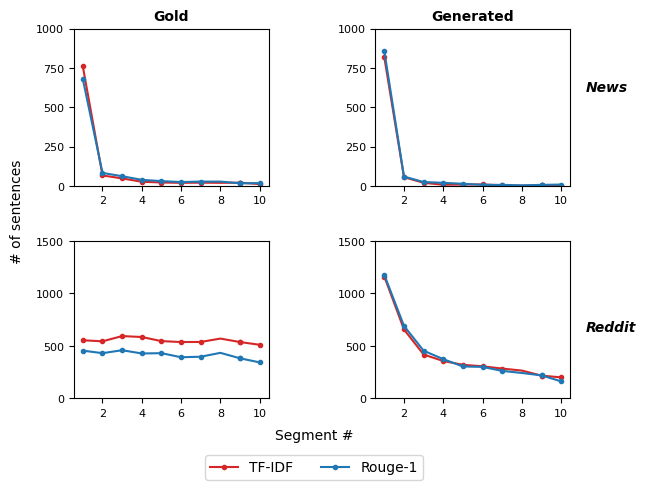

In [12]:
markers=[0,1,2,3,4,5,6,8,8,9]
x = [j for j in range(1,11)]
even_xticks = np.arange(2, 11, 2)

# cnn_ticks=[0,10000,20000,30000]
# xsum_ticks=[0,2500,5000,7500]
news_ticks=[0,250,500,750,1000]
reddit_ticks=[0,500,1000,1500]


fig, axs = plt.subplots(2, 2) #,sharey=True)
#fig.suptitle('Comparing Position Bias in Gold vs Generated Samples across different Models and Datasets')


cumm_list1_tf_news,cumm_list2_tf_news=get_lines(data_llama_news)
cumm_list1_tf_red,cumm_list2_tf_red=get_lines(data_llama_reddit)
cumm_list1_r_news,cumm_list2_r_news=get_lines(data_llama_news_rouge)
cumm_list1_r_red,cumm_list2_r_red=get_lines(data_llama_reddit_rouge)

axs[0,0].plot(x, cumm_list2_tf_news,color='tab:red', marker='.', label="TF-IDF", markevery=markers)
axs[0,0].plot(x, cumm_list2_r_news,color='tab:blue', marker='.', label="Rouge-1", markevery=markers)
axs[0, 0].set_title('Gold',fontsize = 10,weight='bold')
axs[0,0].set_xticks(even_xticks)
axs[0,0].set_xticklabels(even_xticks, fontsize=8)
axs[0,0].set_yticks(news_ticks)
axs[0,0].set_yticklabels(news_ticks, fontsize=8)
axs[0,0].set_ylim([0, 1000])



axs[1, 0].plot(x, cumm_list2_tf_red,color='tab:red', marker='.', label="TF-IDF", markevery=markers)
axs[1, 0].plot(x, cumm_list2_r_red,color='tab:blue', marker='.', label="Rouge-1", markevery=markers)
# axs[1, 0].set_title('Rouge2',fontsize = 10,weight='bold')
axs[1, 0].set_xticks(even_xticks)
axs[1, 0].set_xticklabels(even_xticks, fontsize=8)
axs[1, 0].set_yticks(reddit_ticks)
axs[1, 0].set_yticklabels(reddit_ticks, fontsize=8)
axs[1, 0].set_ylim([0, 1500])



axs[0,1].plot(x, cumm_list1_tf_news,color='tab:red', marker='.', label="TF-IDF", markevery=markers)
axs[0,1].plot(x, cumm_list1_r_news,color='tab:blue', marker='.', label="Rouge-1", markevery=markers)
axs[0, 1].set_title('Generated',fontsize = 10,weight='bold')
axs[0,1].set_xticks(even_xticks)
axs[0,1].set_xticklabels(even_xticks, fontsize=8)
axs[0,1].set_yticks(news_ticks)
axs[0,1].set_yticklabels(news_ticks, fontsize=8)
axs[0,1].set_ylim([0, 1000])



axs[1, 1].plot(x, cumm_list1_tf_red,color='tab:red', marker='.', label="TF-IDF", markevery=markers)
axs[1, 1].plot(x, cumm_list1_r_red,color='tab:blue', marker='.', label="Rouge-1", markevery=markers)
#axs[0, 1].set_title('Reddit',fontsize = 10,weight='bold')
axs[1, 1].set_xticks(even_xticks)
axs[1, 1].set_xticklabels(even_xticks, fontsize=8)
axs[1, 1].set_yticks(reddit_ticks)
axs[1, 1].set_yticklabels(reddit_ticks, fontsize=8)
axs[1, 1].set_ylim([0, 1500])
handles, labels = axs[1, 1].get_legend_handles_labels()
# for ax in axs.flat:
#     ax.set(xlabel='Segment', ylabel='# of sentences')

# fig.supxlabel('Segment #')
# fig.supylabel('# of sentences')

fig.text(0.5, 0.025, 'Segment #', ha='center')
fig.text(0.025, 0.5, '# of sentences', va='center', rotation='vertical')
    
# for ax in axs.flat:
#     ax.label_outer()

plt.gcf().text(0.925, 0.75, "News", fontsize=10,style='italic',weight='bold')
plt.gcf().text(0.925, 0.25, "Reddit", fontsize=10,style='italic',weight='bold')



fig.legend(handles, labels,ncol=2, loc = 'lower center',bbox_to_anchor=(0, -0.075, 1, 1), bbox_transform=plt.gcf().transFigure)
#fig.tight_layout()
# plt.gcf().text(0.02, 0.55, textstr, fontsize=14)
fig.subplots_adjust(hspace=0.35, wspace=0.55)

plt.savefig('tf-idf-rouge-comparison.png',bbox_inches='tight')
plt.show()